In [1]:
# Importamos librerias.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Cargamos el dataset y lo dividimos en conjunto de entrenamiento y prueba.
df = pd.read_csv("./data_processed/task2_depression.csv", index_col=0, encoding='utf-8')
df.head(5)

,Message,Negatives,Neutrals,Positives,Labels
0,haber ser confuso de momento bien y,0.000,1.000,0.000,0
1,espero ser disfrutar tu estancia en el grupo c...,0.000,1.000,0.000,0
2,ser bueno ese hacer cosa nuevo y que ayudar a ...,0.000,1.000,0.000,0
3,pensar hacer tarea y no yo concentrar,0.306,0.694,0.000,0
4,yo alguno vez él hacer pero este vez tener el ...,0.103,0.794,0.103,0


Text(0.5, 1.0, 'Prueba')

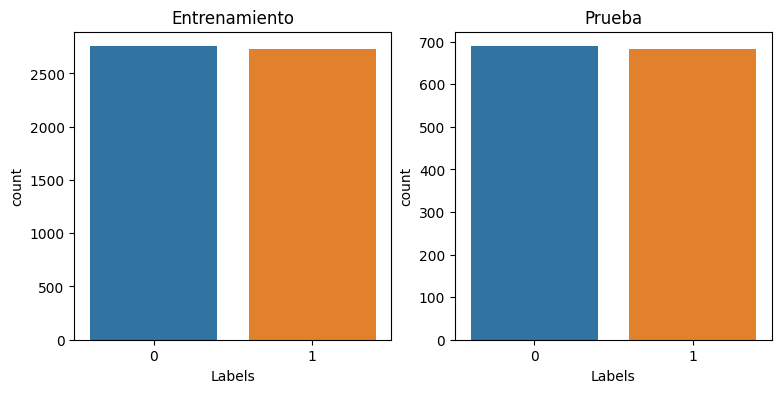

In [3]:
X = df[["Message", "Negatives","Neutrals", "Positives"]]
y = df["Labels"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Crea una matriz de subplots de 2x2
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(9, 4))

# Subplot 1
sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title("Entrenamiento")

# Subplot 2
sns.countplot(x=y_test, ax=axs[1])
axs[1].set_title("Prueba")


In [4]:
# Creamos el vectorizador y lo usamos para ajustarlo a nuestros datos.
vectorizer = TfidfVectorizer()
#vectorizer = CountVectorizer()
# vectorizer = CountVectorizer(binary=False)
vectors_train = vectorizer.fit_transform(X_train['Message'])
vectors_test = vectorizer.transform(X_test['Message'])

df_vectors_train = pd.DataFrame(vectors_train.toarray())
df_polarity_train = pd.DataFrame(X_train[["Negatives","Neutrals", "Positives"]])

df_vectors_test = pd.DataFrame(vectors_test.toarray())
df_polarity_test = pd.DataFrame(X_test[["Negatives","Neutrals", "Positives"]])

df_vectors_train.to_csv('./data_processed/vectors_train.csv', index=False)
df_polarity_train.to_csv('./data_processed/polarity_train.csv', index=False)

df_vectors_test.to_csv('./data_processed/vectors_test.csv', index=False)
df_polarity_test.to_csv('./data_processed/polarity_test.csv', index=False)

In [5]:
df_vectors_train = pd.read_csv("./data_processed/vectors_train.csv", index_col=None, encoding='utf-8')
df_polarity_train = pd.read_csv("./data_processed/polarity_train.csv", index_col=None, encoding='utf-8')

df_vectors_test = pd.read_csv("./data_processed/vectors_test.csv", index_col=None, encoding='utf-8')
df_polarity_test = pd.read_csv("./data_processed/polarity_test.csv", index_col=None, encoding='utf-8')

In [6]:
X_train = pd.concat([df_vectors_train, df_polarity_train], axis=1)

X_test = pd.concat([df_vectors_test, df_polarity_test], axis=1)

In [7]:
X_train.to_csv('./data_processed/X_train.csv',index=False, encoding='utf-8')
X_test.to_csv('./data_processed/X_test.csv',index=False, encoding='utf-8')
y_train.to_csv('./data_processed/y_train.csv',index=False, encoding='utf-8')
y_test.to_csv('./data_processed/y_test.csv',index=False, encoding='utf-8')

print('Datos de entrenamiento:')
print(X_train.shape)
print(y_train.shape)
print('Datos de prueba:')
print(X_test.shape)
print(y_test.shape)

Datos de entrenamiento:
(5482, 6358)
(5482,)
Datos de prueba:
(1371, 6358)
(1371,)
